# Decision Tree with MovieLens Dataset

MovieLens dataset ကို အသုံးပြုပြီး Decision Tree Classifier နဲ့ ရုပ်ရှင် rating ခန့်မှန်းခြင်း

**Dataset**: https://www.kaggle.com/datasets/ayushimishra2809/movielens-dataset

**Goal**: User ရဲ့ rating behavior ကို predict လုပ်မယ် (High/Low rating)
############################################################################################################################################


Step 1: import Library 

In [ ]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

Step 2: Data Load ပြုလုပ်ခြင်း (Data Loading)
-   Kaggle မှ ရရှိလာသော Dataset များကို သတ်မှတ်ထားသည့် Directory လမ်းကြောင်း (Path) မှတစ်ဆင့် Python ထဲသို့ ဖတ်ယူသွင်းပေးခြင်း ဖြစ်သည်။

In [2]:
# Data Load
# Data သိမ်းထားတဲ့ Folder လမ်းကြောင်းကို သတ်မှတ်ခြင်း
DATA_PATH = r'C:\Users\MSI\Desktop\Git_Project\AI_2026\Day05 Decision tree and Essemble method\example\psa_movieLens'

# CSV ဖိုင်များကို Pandas သုံးပြီး ဖတ်ယူခြင်း
ratings = pd.read_csv(f'{DATA_PATH}\\ratings.csv') # Rating ပေးထားချက်များကို ဖတ်ခြင်း
movies = pd.read_csv(f'{DATA_PATH}\\movies.csv')   # ရုပ်ရှင်စာရင်းများကို ဖတ်ခြင်း

# ရရှိလာတဲ့ Data ရဲ့ အတိုင်းအတာ (Rows, Columns) ကို ကြည့်ခြင်း
print("Ratings shape:", ratings.shape) 
print("Movies shape:", movies.shape)

# Column ခေါင်းစဉ်များ ဘာတွေပါလဲဆိုတာကို List အနေနဲ့ ထုတ်ကြည့်ခြင်း
print("\nRatings columns:", ratings.columns.tolist())
print("Movies columns:", movies.columns.tolist())

Ratings shape: (105339, 4)
Movies shape: (10329, 3)

Ratings columns: ['userId', 'movieId', 'rating', 'timestamp']
Movies columns: ['movieId', 'title', 'genres']


Step 3: Data Preview (ဒေတာများကို အစမ်းထုတ်ကြည့်ခြင်း)
-   ဖတ်ယူထားတဲ့ Data Table တွေထဲမှာ ဘယ်လိုအချက်အလက်တွေ ပါဝင်နေသလဲဆိုတာကို ပထမဆုံး အကြောင်းအရာအနည်းငယ် (Top 5 rows) ထုတ်ကြည့်ပြီး စစ်ဆေးတဲ့ အဆင့်ဖြစ်ပါတယ်။

In [3]:
# Data Preview
# Ratings table ထဲက data တွေကို စတင်စစ်ဆေးခြင်း
print("=== Ratings Data ===")
display(ratings.head()) # Ratings ရဲ့ ထိပ်ဆုံး row ၅ ခုကို table ပုံစံဖြင့် ပြသခြင်း

# Movies table ထဲက data တွေကို စတင်စစ်ဆေးခြင်း
print("\n=== Movies Data ===")
display(movies.head()) # Movies ရဲ့ ထိပ်ဆုံး row ၅ ခုကို table ပုံစံဖြင့် ပြသခြင်း

=== Ratings Data ===


,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523



=== Movies Data ===


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Step 4: Data Integration (ဒေတာများ ပေါင်းစပ်ခြင်း)
-   သီးခြားစီဖြစ်နေတဲ့ ratings (အမှတ်ပေးစာရင်း) နဲ့ movies (ရုပ်ရှင်အမည်များ) ဇယားနှစ်ခုကို movieId ဆိုတဲ့ ဘုံတူညီတဲ့ Column တစ်ခုပေါ် မူတည်ပြီး တစ်ခုတည်းဖြစ်သွားအောင် ပေါင်းစပ်တဲ့ အဆင့်ဖြစ်ပါတယ်။

In [4]:
# Merge ratings with movies
# movieId ကို အခြေခံပြီး ဇယားနှစ်ခုကို တစ်ခုတည်းဖြစ်အောင် ပေါင်းခြင်း
df = ratings.merge(movies, on='movieId')

# ပေါင်းပြီးသွားတဲ့ Data Table အသစ်ရဲ့ အရွယ်အစား (Rows, Columns) ကို စစ်ဆေးခြင်း
print("Merged data shape:", df.shape)

# ပေါင်းစပ်ပြီးထွက်လာတဲ့ Data ၅ ကြောင်းကို နမူနာ ထုတ်ကြည့်ခြင်း
display(df.head())

Merged data shape: (105339, 6)


,userId,movieId,rating,timestamp,title,genres
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama
1,1,24,1.5,1217895807,Powder (1995),Drama|Sci-Fi
2,1,32,4.0,1217896246,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,4.0,1217896556,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,4.0,1217896523,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


Step 5: Feature Engineering (အချက်အလက်သစ်များ ပြင်ဆင်ဖန်တီးခြင်း)
-   Machine Learning Model အတွက် ပိုမိုကောင်းမွန်တဲ့ ခန့်မှန်းချက်တွေ ရနိုင်ဖို့ လက်ရှိရှိနေတဲ့ Data တွေကနေ Feature အသစ်တွေ ထုတ်ယူတဲ့ အဆင့်ဖြစ်ပါတယ်။

In [5]:
# Feature Engineering
# Genre (အမျိုးအစား) များကို One-hot encoding ပုံစံဖြင့် ခွဲထုတ်ခြင်း (ဥပမာ- Action, Comedy)
genres = df['genres'].str.get_dummies(sep='|') # '|' သင်္ကေတဖြင့် ခွဲပြီး Column အသစ်များ ပြောင်းခြင်း
display(genres.head()) # Genre columns များကို နမူနာ ထုတ်ကြည့်ခြင်း


,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0


In [6]:
# User တစ်ဦးချင်းစီရဲ့ အမှတ်ပေးမှု အလေ့အထများကို တွက်ချက်ခြင်း (User Statistics)
user_stats = df.groupby('userId').agg({
    'rating': ['mean', 'count', 'std'] # ပျမ်းမျှအမှတ်၊ အကြိမ်ရေ နှင့် သွေဖည်ကိန်းတို့ကို တွက်ခြင်း
}).reset_index()
display(user_stats.head())

# Column နာမည်များကို အလွယ်တကူ ခေါ်သုံးနိုင်ရန် ပြောင်းလဲသတ်မှတ်ခြင်း
user_stats.columns = ['userId', 'user_avg_rating', 'user_rating_count', 'user_rating_std']
display(user_stats.head())

print("User stats columns after rename:", user_stats.columns.tolist())


userId    rating                
              mean count       std
0      1  3.628319   113  1.133458
1      2  3.896552    29  0.816999
2      3  3.794521    73  0.798591
3      4  4.161290   124  0.810371
4      5  3.183824    68  1.368364

,userId,user_avg_rating,user_rating_count,user_rating_std
0,1,3.628319,113,1.133458
1,2,3.896552,29,0.816999
2,3,3.794521,73,0.798591
3,4,4.161290,124,0.810371
4,5,3.183824,68,1.368364


User stats columns after rename: ['userId', 'user_avg_rating', 'user_rating_count', 'user_rating_std']


In [7]:

# Standard Deviation (std) တန်ဖိုး မရှိသည့် (NaN) နေရာများတွင် 0 ဖြည့်သွင်းခြင်း
user_stats['user_rating_std'] = user_stats['user_rating_std'].fillna(0)

print("\nUser stats after filling NaN values:")
display(user_stats.head())


User stats after filling NaN values:


,userId,user_avg_rating,user_rating_count,user_rating_std
0,1,3.628319,113,1.133458
1,2,3.896552,29,0.816999
2,3,3.794521,73,0.798591
3,4,4.161290,124,0.810371
4,5,3.183824,68,1.368364


In [8]:
# ရုပ်ရှင်တစ်ကားချင်းစီရဲ့ Rating အခြေအနေများကို တွက်ချက်ခြင်း (Movie Statistics)
movie_stats = df.groupby('movieId').agg({
    'rating': ['mean', 'count'] # ရုပ်ရှင်တစ်ခုချင်းစီရဲ့ ပျမ်းမျှအမှတ် နှင့် လူဘယ်နှစ်ယောက် ပေးထားလဲဆိုသည်ကို တွက်ခြင်း
}).reset_index()

print("\nMovie stats columns before rename:", movie_stats.columns.tolist())


Movie stats columns before rename: [('movieId', ''), ('rating', 'mean'), ('rating', 'count')]


In [9]:

# Movie statistics အတွက် column နာမည်များ သတ်မှတ်ခြင်း
movie_stats.columns = ['movieId', 'movie_avg_rating', 'movie_rating_count']
print("Movie stats columns after rename:", movie_stats.columns.tolist())
display(movie_stats.head()) 

# ထွက်လာသည့် Feature အသစ်များ၏ အရွယ်အစားကို စစ်ဆေးခြင်း
print("\nUser stats shape:", user_stats.shape)
print("Movie stats shape:", movie_stats.shape)

Movie stats columns after rename: ['movieId', 'movie_avg_rating', 'movie_rating_count']


,movieId,movie_avg_rating,movie_rating_count
0,1,3.907328,232
1,2,3.353261,92
2,3,3.189655,58
3,4,2.818182,11
4,5,3.250000,62



User stats shape: (668, 4)
Movie stats shape: (10325, 3)


Step 6: Final Dataset ပြင်ဆင်ခြင်း (Final Dataset Preparation)
-   တွက်ချက်ထားတဲ့ Feature အသစ်တွေအားလုံးကို စုစည်းပြီး Machine Learning Model ထဲ ထည့်သွင်းဖို့အတွက် နောက်ဆုံးအဆင့် Dataset အဖြစ် ပြင်ဆင်တာဖြစ်ပါတယ်။ Classification လုပ်ဖို့အတွက် Target Variable ($0$ သို့မဟုတ် $1$) ကိုပါ တစ်ခါတည်း သတ်မှတ်လိုက်ပါတယ်။

In [10]:
# Final Dataset ပြင်ဆင်ခြင်း
# မူလ Data ထဲသို့ User stats နှင့် Movie stats များကို ပေါင်းထည့်ခြင်း
df_final = df.merge(user_stats, on='userId').merge(movie_stats, on='movieId')
display(df_final.head())    

# One-hot encoding လုပ်ထားသော Genres column များကို ဘေးတိုက် (Axis=1) ပေါင်းထည့်ခြင်း
df_final = pd.concat([df_final, genres], axis=1)
display(df_final.head())    



,userId,movieId,rating,timestamp,title,genres,user_avg_rating,user_rating_count,user_rating_std,movie_avg_rating,movie_rating_count
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama,3.628319,113,1.133458,3.785714,84
1,1,24,1.5,1217895807,Powder (1995),Drama|Sci-Fi,3.628319,113,1.133458,2.894737,38
2,1,32,4.0,1217896246,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,3.628319,113,1.133458,3.939614,207
3,1,47,4.0,1217896556,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,3.628319,113,1.133458,4.130102,196
4,1,50,4.0,1217896523,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,3.628319,113,1.133458,4.328947,228


,userId,movieId,rating,timestamp,title,genres,user_avg_rating,user_rating_count,user_rating_std,movie_avg_rating,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama,3.628319,113,1.133458,3.785714,...,0,0,0,0,0,0,0,0,0,0
1,1,24,1.5,1217895807,Powder (1995),Drama|Sci-Fi,3.628319,113,1.133458,2.894737,...,0,0,0,0,0,0,1,0,0,0
2,1,32,4.0,1217896246,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,3.628319,113,1.133458,3.939614,...,0,0,0,0,1,0,1,1,0,0
3,1,47,4.0,1217896556,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,3.628319,113,1.133458,4.130102,...,0,0,0,0,1,0,0,1,0,0
4,1,50,4.0,1217896523,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,3.628319,113,1.133458,4.328947,...,0,0,0,0,1,0,0,1,0,0


In [11]:
# Binary Classification အတွက် Target သတ်မှတ်ခြင်း
# Rating 4 နှင့်အထက်ဆိုလျှင် 1 (High Rating)၊ 4 အောက်ဆိုလျှင် 0 (Low Rating) ဟု သတ်မှတ်ခြင်း
df_final['high_rating'] = (df_final['rating'] >= 4).astype(int)
display(df_final[['rating', 'high_rating']].head())

# နောက်ဆုံးထွက်လာသော Dataset ၏ အရွယ်အစားကို စစ်ဆေးခြင်း
print("Final dataset shape:", df_final.shape)

# High Rating (1) နှင့် Low Rating (0) အရေအတွက် မည်မျှစီ ပါဝင်သည်ကို စစ်ဆေးခြင်း
print("\nTarget distribution:")
print(df_final['high_rating'].value_counts())

,rating,high_rating
0,4.0,1
1,1.5,0
2,4.0,1
3,4.0,1
4,4.0,1


Final dataset shape: (105339, 32)

Target distribution:
high_rating
0    53416
1    51923
Name: count, dtype: int64


Step 7: Features နှင့် Target ခွဲခြားခြင်း (Splitting Features and Target)
-   Model ကို လေ့ကျင့်ပေးဖို့အတွက် အသုံးပြုမယ့် အချက်အလက်များ (Features) နဲ့ ခန့်မှန်းလိုတဲ့ အဖြေ (Target) ကို သီးခြားစီ ခွဲထုတ်တဲ့ အဆင့်ဖြစ်ပါတယ်။

In [12]:
# Features and Target ခွဲခြားခြင်း
# Model ထဲသို့ ထည့်သွင်းတွက်ချက်မည့် Column နာမည်များကို စုစည်းခြင်း
feature_cols = ['user_avg_rating', 'user_rating_count', 'user_rating_std',
                'movie_avg_rating', 'movie_rating_count'] + genres.columns.tolist()

X = df_final[feature_cols]      # သင်ကြားပေးမည့် အချက်အလက်များ (Input Data)
y = df_final['high_rating']    # ခန့်မှန်းခိုင်းမည့် အဖြေ (Target Label)

# Feature နှင့် Target တို့၏ အရွယ်အစားကို စစ်ဆေးခြင်း
print("Features shape:", X.shape)
print("Target shape:", y.shape)

# Feature columns များထဲမှ အစပိုင်း ၅ ခုနှင့် စုစုပေါင်း Genre အရေအတွက်ကို ပြသခြင်း
print("\nFeature columns:", feature_cols[:5], "... +", len(genres.columns), "genre columns")

Features shape: (105339, 25)
Target shape: (105339,)

Feature columns: ['user_avg_rating', 'user_rating_count', 'user_rating_std', 'movie_avg_rating', 'movie_rating_count'] ... + 20 genre columns


Step 8: Train/Test Split (ဒေတာများကို လေ့ကျင့်ရန်နှင့် စမ်းသပ်ရန် ခွဲခြားခြင်း)
-   Model ကို သင်ကြားပေးရန်အတွက် ဒေတာတစ်စုနှင့် Model ၏ စွမ်းဆောင်ရည် မှန်/မမှန် ပြန်လည်စစ်ဆေးရန်အတွက် ဒေတာတစ်စုဟူ၍ အပိုင်းနှစ်ပိုင်း ခွဲခြားလိုက်ခြင်း ဖြစ်သည်။

In [13]:
# Train/Test Split
# Data များကို Training set (၈၀%) နှင့် Test set (၂၀%) ဟူ၍ ခွဲခြားခြင်း
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ခွဲခြားပြီးနောက် ရရှိလာသည့် ဒေတာပမာဏကို စစ်ဆေးခြင်း
print("Training set:", X_train.shape) # Model သင်ယူရန်အတွက် အသုံးပြုမည့် အချက်အလက်
print("Test set:", X_test.shape)     # Model ကို ပြန်လည်စစ်ဆေးရန်အတွက် အသုံးပြုမည့် အချက်အလက်

Training set: (84271, 25)
Test set: (21068, 25)


Step 9: Decision Tree Model တည်ဆောက်ခြင်း (Model Building & Training)
-   ပြင်ဆင်ထားတဲ့ Training Data တွေကို အသုံးပြုပြီး Decision Tree Model တစ်ခုကို စတင်တည်ဆောက်ကာ စက်ကို သင်ကြားပေး (Training) တဲ့ အဆင့်ဖြစ်ပါတယ်။

In [14]:
# Decision Tree Model
# Decision Tree Classifier ကို သတ်မှတ်ချက်များဖြင့် စတင်တည်ဆောက်ခြင်း
dt_model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=5,           # Tree ၏ အလွှာအနက်ကို ၅ ထပ်အထိပဲ ကန့်သတ်ခြင်း (Overfitting မဖြစ်စေရန်)
    min_samples_split=10,  # အချက်အလက် အနည်းဆုံး ၁၀ ခုရှိမှသာ အကိုင်းအခက် ဆက်ခွဲရန် သတ်မှတ်ခြင်း
    random_state=42        # ရလဒ် တည်ငြိမ်စေရန်အတွက် random state သတ်မှတ်ခြင်း
)

# Training Data (X_train, y_train) ကို သုံးပြီး Model ကို သင်ကြားပေးခြင်း
dt_model.fit(X_train, y_train)

print("Model training complete!") # Model သင်ယူမှု ပြီးဆုံးကြောင်း ပြသခြင်း

Model training complete!


Step 10: Prediction and Evaluation (ခန့်မှန်းခြင်းနှင့် စွမ်းဆောင်ရည်စစ်ဆေးခြင်း)
-   Model ကို သင်ကြားပြီးနောက် မမြင်ဖူးသေးတဲ့ Test Data တွေကို ပေးပြီး ခန့်မှန်းခိုင်းခြင်း ဖြစ်ပါတယ်။ ထွက်လာတဲ့ ရလဒ်တွေဟာ တကယ့်အဖြေမှန်တွေနဲ့ ဘယ်လောက်နီးစပ်သလဲဆိုတာကို Evaluation Metrics တွေနဲ့ တိုင်းတာစစ်ဆေးပါတယ်။

In [15]:
# Prediction and Evaluation
# စမ်းသပ်ရန်ဖယ်ထားသော X_test ကို သုံးပြီး Rating များကို ခန့်မှန်းခြင်း
y_pred = dt_model.predict(X_test)

# အဖြေမှန် (y_test) နှင့် ခန့်မှန်းချက် (y_pred) မည်မျှ ကိုက်ညီသလဲ (Accuracy) ကို တွက်ချက်ခြင်း
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}") # တိကျမှု ရာခိုင်နှုန်းကို ဒသမ ၄ နေရာဖြင့် ပြသခြင်း

Accuracy: 0.7367


Step 11: Decision Tree Visualization (ဆုံးဖြတ်ချက်ချပုံကို ပုံဖော်ကြည့်ခြင်း)
-   ဒါကတော့ Decision Tree Model က Data တွေအပေါ် မူတည်ပြီး ဘယ်လိုမျိုး အဆင့်ဆင့် စဉ်းစားသွားတယ်ဆိုတာကို မျက်စိနဲ့ မြင်သာအောင် ဇယားပုံစံ (Tree Diagram) ဖြင့် ထုတ်ကြည့်တဲ့ အဆင့်ဖြစ်ပါတယ်။

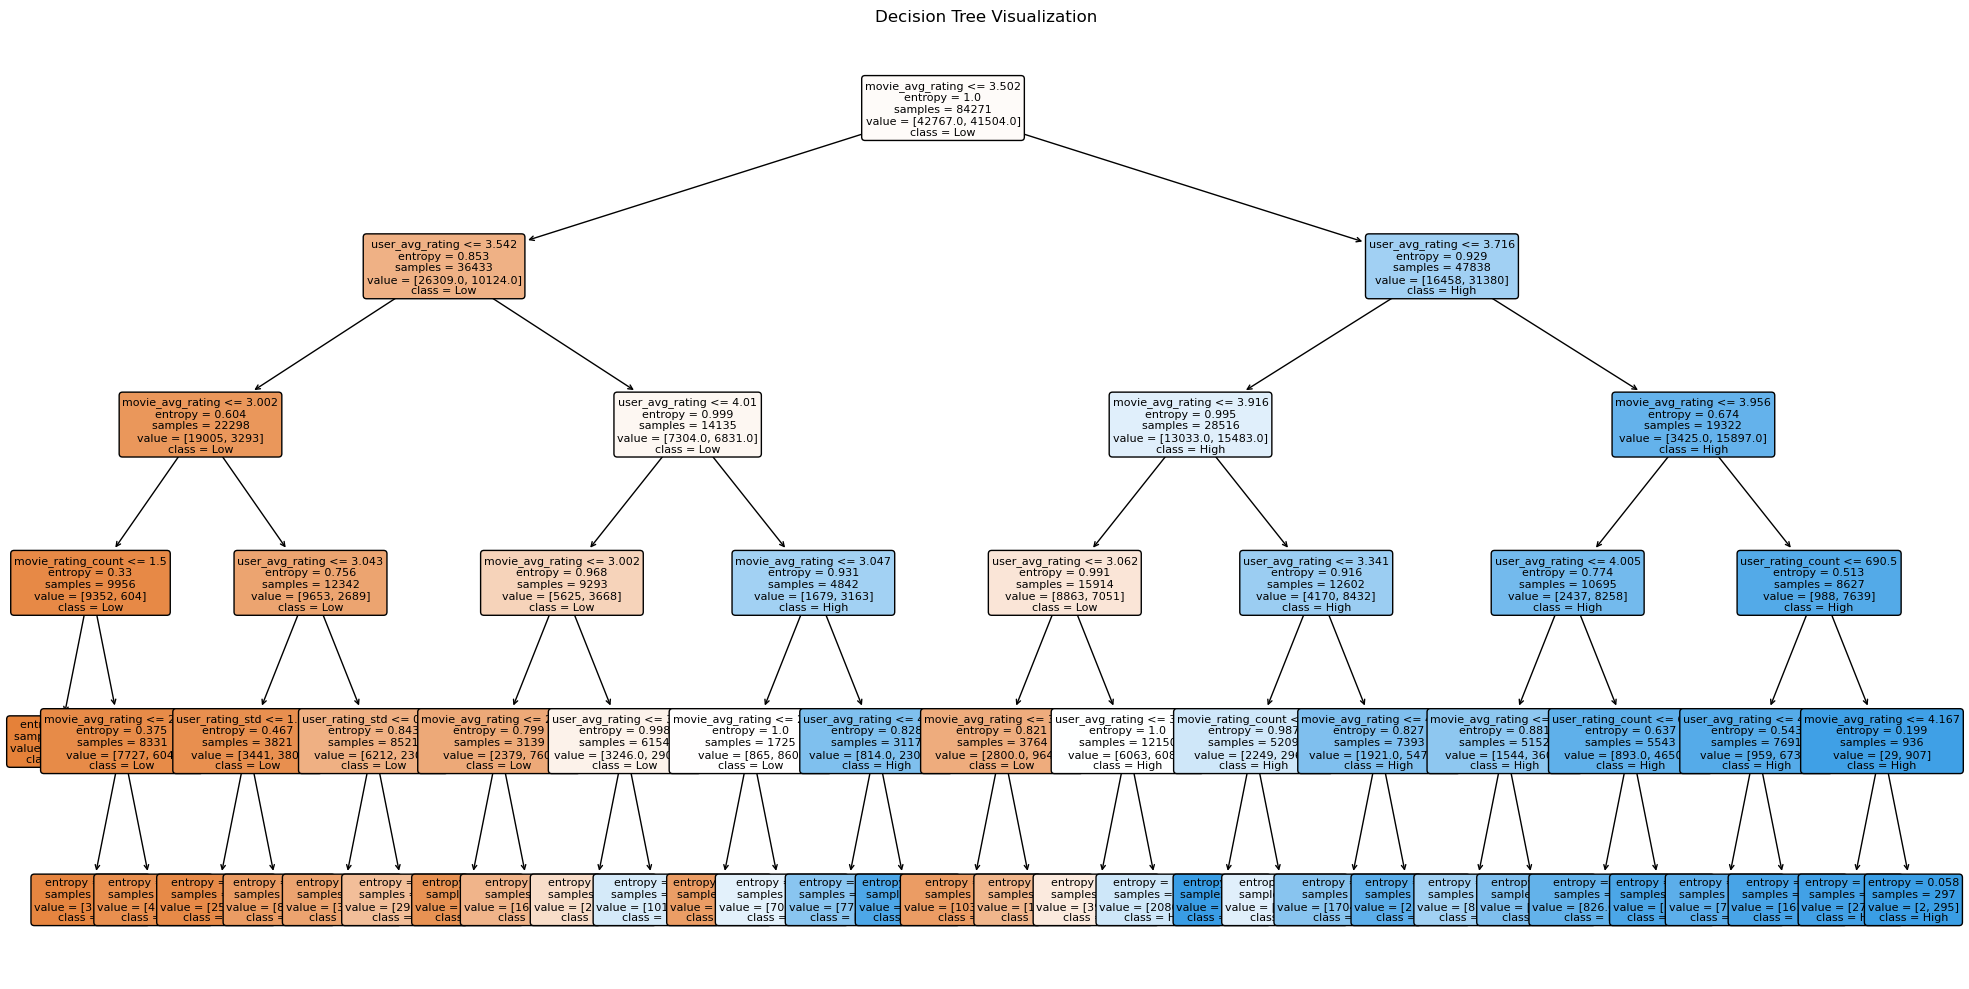

In [16]:
# Decision Tree Visualization
# ပုံရဲ့ အရွယ်အစားကို အလျား ၂၀၊ အနံ ၁၀ လက်မ သတ်မှတ်ခြင်း
plt.figure(figsize=(20, 10))

# Decision Tree ကို ပုံဖော်ရန် plot_tree function ကို သုံးခြင်း
plot_tree(dt_model, 
          feature_names=feature_cols,      # အသုံးပြုထားသည့် feature အမည်များ ထည့်သွင်းခြင်း
          class_names=['Low', 'High'],     # ခွဲခြားမည့် အတန်းအစား အမည်များ သတ်မှတ်ခြင်း
          filled=True,                     # ရလဒ်အလိုက် အရောင်များ ဖြည့်သွင်းခြင်း (ဥပမာ- High ဆိုလျှင် အပြာ)
          rounded=True,                    # အကွက်လေးများကို ထောင့်ဝိုင်းပုံစံ ပြုလုပ်ခြင်း
        #   impurity=False,
        #   label='none',
          fontsize=8)                      # စာလုံးအရွယ်အစား သတ်မှတ်ခြင်း

plt.title('Decision Tree Visualization') # ပုံ၏ ခေါင်းစဉ်ကို သတ်မှတ်ခြင်း
plt.tight_layout() # ပုံကို နေရာလွတ်မကျန် သေသေသပ်သပ် ဖြစ်စေခြင်း
plt.show() # ပုံကို ထုတ်ပြခြင်း

Step 12: Feature Importance (အရေးပါသော အချက်အလက်များကို စစ်ဆေးခြင်း)
-   Model က Rating တွေကို ခန့်မှန်းတဲ့နေရာမှာ ဘယ်အချက်အလက် (Feature) တွေအပေါ်မှာ ပိုပြီး အဓိကထား ဆုံးဖြတ်သွားသလဲဆိုတာကို ရှာဖွေတာဖြစ်ပါတယ်။ ဒါကိုကြည့်ခြင်းအားဖြင့် Model ရဲ့ စဉ်းစားပုံကို ပိုမိုနားလည်နိုင်ပါတယ်။

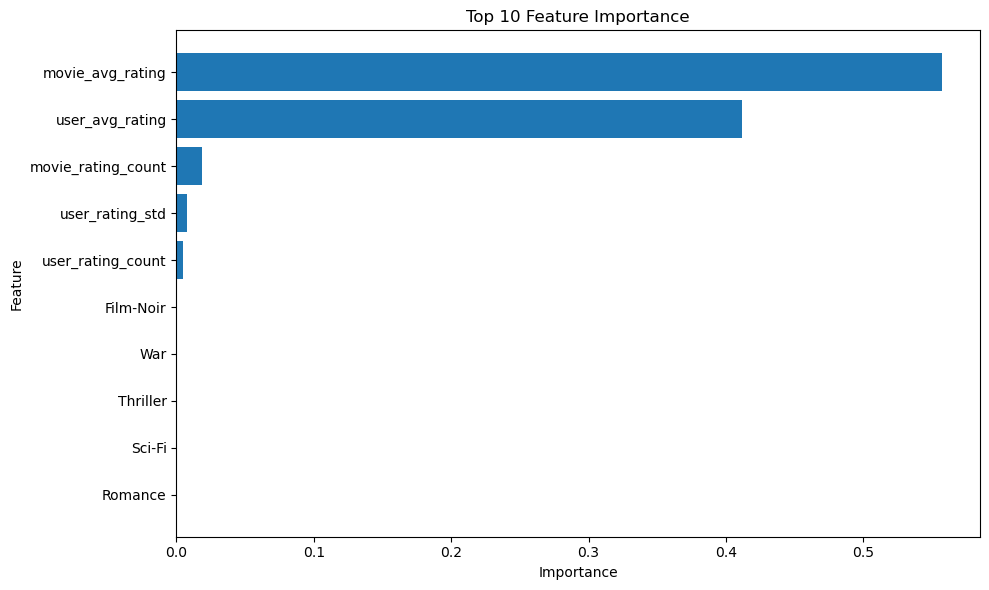


Top 10 Features:


,feature,importance
3,movie_avg_rating,0.557056
0,user_avg_rating,0.411842
4,movie_rating_count,0.018736
2,user_rating_std,0.007643
1,user_rating_count,0.004722
15,Film-Noir,0.000000
23,War,0.000000
22,Thriller,0.000000
21,Sci-Fi,0.000000
20,Romance,0.000000


In [17]:
# Feature Importance
# Feature တစ်ခုချင်းစီရဲ့ အရေးပါမှုနှုန်းကို DataFrame အဖြစ် ပြုလုပ်ခြင်း
importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': dt_model.feature_importances_ # Model ထဲမှ အရေးပါမှု တန်ဖိုးများကို ထုတ်ယူခြင်း
}).sort_values('importance', ascending=False) # တန်ဖိုးအကြီးဆုံးမှ အငယ်သို့ စီခြင်း

# ထိပ်ဆုံး Feature ၁၀ ခုကို Bar Chart ဖြင့် ပုံဖော်ခြင်း
plt.figure(figsize=(10, 6))
plt.barh(importance['feature'][:10], importance['importance'][:10]) # အလျားလိုက် Bar graph ဆွဲခြင်း
plt.xlabel('Importance') # X-axis ကို အရေးပါမှုနှုန်းဟု သတ်မှတ်ခြင်း
plt.ylabel('Feature')    # Y-axis ကို Feature အမည်ဟု သတ်မှတ်ခြင်း
plt.title('Top 10 Feature Importance') # ပုံ၏ ခေါင်းစဉ်
plt.gca().invert_yaxis() # အရေးပါမှု အများဆုံးကို အပေါ်ဆုံးတွင် ထားခြင်း
plt.tight_layout()
plt.show()

# ထိပ်ဆုံး Feature ၁၀ ခုကို စာရင်း (Table) အနေဖြင့် ထုတ်ကြည့်ခြင်း
print("\nTop 10 Features:")
display(importance.head(10))

# Random Forest with MovieLens Dataset

In [18]:
# 1. Random Forest Library ကို ခေါ်ယူခြင်း
from sklearn.ensemble import RandomForestClassifier

# 2. Model တည်ဆောက်ခြင်း
# n_estimators=100 ဆိုသည်မှာ Decision Tree ပေါင်း ၁၀၀ ကို အသုံးပြုမည်ဟု ဆိုလိုသည်
# max_features='sqrt' သည် သစ်ပင်တစ်ပင်စီအတွက် feature များကို ကျပန်းရွေးချယ်ရာတွင် သုံးသောနည်းလမ်းဖြစ်သည်
rf_model = RandomForestClassifier(n_estimators=100, 
                                  max_depth=10, 
                                  random_state=42) 

# 3. Model ကို စာသင်ပေးခြင်း (Training)
rf_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, random_state=42)

In [19]:
# 4. ခန့်မှန်းခိုင်းခြင်း (Prediction)
y_pred_rf = rf_model.predict(X_test)

# 5. ရလဒ်ကို စစ်ဆေးခြင်း
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

Random Forest Accuracy: 0.7542
